<a href="https://colab.research.google.com/github/nupuriyer/target_sentiment_analysis/blob/main/MMAI_5400_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime as dt
import os

# Initialize lists
companyName = []
datePublished = []
ratingValue = []
reviewBody = []

# To scrape from multiple pages
from_page = 1
to_page = 136

for i in range(from_page, to_page + 1):
    response = requests.get(f"https://www.trustpilot.com/review/www.target.com?page={i}")
    web_page = response.text
    if response.status_code != 200:
        print(response)
    soup = BeautifulSoup(web_page, "html.parser")

    container = soup.find('section', class_ = "styles_reviewsContainer__3_GQw")
    review_content = container.find_all('p', class_ = "typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn")
    for review in review_content:
        reviewBody.append(review.text)
        company_name = soup.find('span', class_ = "typography_display-s__qOjh6 typography_appearance-default__AAY17 title_displayName__TtDDM").text
        companyName.append(company_name.rstrip('\xa0'))
    stars = container.find_all('div', class_ = "styles_reviewHeader__iU9Px")
    for star in stars:
        ratingValue.append(star.attrs["data-service-review-rating"])
    time_of_review = container.find_all('time')
    for date_pub in time_of_review:
        datePublished.append(date_pub.attrs['datetime'])


print(len(ratingValue))
print(len(companyName))
print(len(reviewBody))
print(len(datePublished))

df = pd.DataFrame(list(zip(companyName, datePublished, ratingValue, reviewBody)), columns = ['companyName', 'datePublished', 'ratingValue', 'reviewBody'])

cwd = os.getcwd()
path = cwd + "/target_reviews.csv"
df.to_csv(path)

2720
2638
2638
2720


In [ ]:
target_df = pd.read_csv('/content/target_reviews.csv')
target_df.head()

,Unnamed: 0,companyName,datePublished,ratingValue,reviewBody
0,0,Target,2023-08-19T09:48:18.000Z,1,Website doesn't work properly using Google Chr...
1,1,Target,2023-08-18T17:44:46.000Z,1,"Target.com is the worst , they received my ret..."
2,2,Target,2023-08-17T18:32:33.000Z,1,"Jonesboro, AR Target is the worst Target in th..."
3,3,Target,2023-08-15T11:33:53.000Z,1,i am floored at the policy Target has regardin...
4,4,Target,2023-08-16T19:15:51.000Z,1,I processed a return on an item ordered throug...


In [ ]:
target_df['ratingValue'].unique()

array([1, 5, 3, 4, 2])

'Value Counts for each Sentiment class before undersampling: '

0    1933
2     617
1      88
Name: Sentiment, dtype: int64

,Unnamed: 0,companyName,datePublished,ratingValue,reviewBody,Sentiment
0,0,Target,2023-08-19T09:48:18.000Z,1,Website doesn't work properly using Google Chr...,0
1,1,Target,2023-08-18T17:44:46.000Z,1,"Target.com is the worst , they received my ret...",0
2,2,Target,2023-08-17T18:32:33.000Z,1,"Jonesboro, AR Target is the worst Target in th...",0
3,3,Target,2023-08-15T11:33:53.000Z,1,i am floored at the policy Target has regardin...,0
4,4,Target,2023-08-16T19:15:51.000Z,1,I processed a return on an item ordered throug...,0


'Value Counts for each Sentiment class after undersampling: '

0    2021
2      88
Name: Sentiment, dtype: int64

,Sentiment,reviewBody
0,0,Website doesn't work properly using Google Chr...
1,0,"Target.com is the worst , they received my ret..."
2,0,"Jonesboro, AR Target is the worst Target in th..."
3,0,i am floored at the policy Target has regardin...
4,0,I processed a return on an item ordered throug...


(1476, 2)
(633, 2)
Model 1 Accuracy:  0.9589257503949447
Model 1 class-wise f1 score:  [0.97903226 0.        ]
Model 1 macro averaged f1 score:  0.48951612903225805


'Model 1 confusion matrix (normalized over all) '

[Text(0.5, 23.52222222222222, 'Predicted Values'),
 Text(50.722222222222214, 0.5, 'Actual Values')]

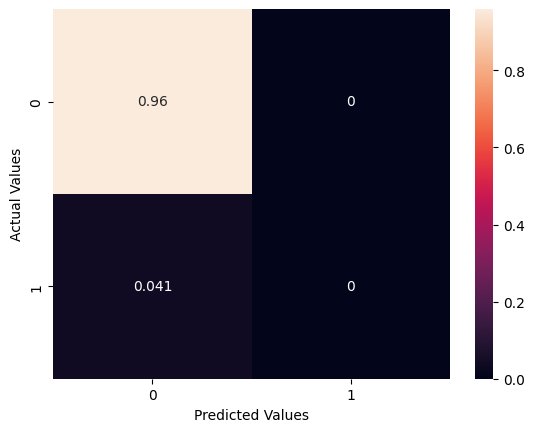

In [ ]:
# Import statements
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.feature_extraction.text import TfidfTransformer

# Data splitting
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Model Compilation
from sklearn.pipeline import Pipeline

# Visualizing the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt


# File path
common_file_path = ""

# Reading the data
reviews = pd.read_csv(common_file_path+"target_reviews.csv")
reviews.head()

reviews["ratingValue"].value_counts()

# Binning RatingValues into 0, 1 and 2 bins for bad, neutral and good categories respectively
reviews.loc[reviews['ratingValue'].between(1, 2, 'both'), 'Sentiment'] = 0
reviews.loc[reviews['ratingValue'].between(3, 3, 'both'), 'Sentiment'] = 1
reviews.loc[reviews['ratingValue'].between(4, 5, 'both'), 'Sentiment'] = 2

# Converting Sentiment from float to integer
reviews["Sentiment"] = reviews["Sentiment"].astype(int)

display("Value Counts for each Sentiment class before undersampling: ", reviews["Sentiment"].value_counts())

# Undersampling to balance data
ratingbin2 = reviews[reviews["Sentiment"] == 2].sample(n=len(reviews[reviews["Sentiment"] == 1]), random_state=101)
ratingbin1 = reviews[reviews["Sentiment"] == 0].sample(n=len(reviews[reviews["Sentiment"] == 1]), random_state=101)

# Resampled dataset
reviews_rs = pd.concat([reviews[reviews["Sentiment"] == 0], ratingbin1, ratingbin2],axis=0)

display(reviews_rs.head())

display("Value Counts for each Sentiment class after undersampling: ", reviews_rs["Sentiment"].value_counts())

# Creating Sentiment Table
sentiment_df = reviews_rs[["Sentiment", "reviewBody"]]
display(sentiment_df.head())

# Preprocessing data - Phase 2: preparing data for language model
# This will ideally be taken care of with CountVectorizer
sentiment_df["reviewBody"].apply(lambda x: re.sub('[^A-Za-z]', ' ', x).lower())

# Train/Validation split with retention of class ratios
train_df, valid_df = train_test_split(sentiment_df, stratify = sentiment_df["Sentiment"], test_size=.3, random_state=101)
print(train_df.shape)
print(valid_df.shape)
valid_df.to_csv(common_file_path + "valid.csv")
train_df.to_csv(common_file_path + "train.csv")

# Loading training and validation sets from saved files
train = pd.read_csv(common_file_path + "train.csv")
valid = pd.read_csv(common_file_path + "valid.csv")

# Defining model 1 pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer(token_pattern=r"(?u)\b\w+\b", lowercase = True, ngram_range = (1,2), stop_words='english')),
    ('tfidf', TfidfTransformer(use_idf = True)),
    ('clf', SGDClassifier(alpha = 0.001)),
])

text_clf.fit(train["reviewBody"], train["Sentiment"])

y_pred = text_clf.predict(valid["reviewBody"])

# Defining model 2 pipeline
text_clf2 = Pipeline([
    ('vect', CountVectorizer(token_pattern=r"(?u)\b\w+\b", lowercase = True, ngram_range = (1,2), stop_words='english')),
    ('tfidf', TfidfTransformer(use_idf = True)),
    ('clf', MultinomialNB()),
])

text_clf2.fit(train["reviewBody"], train["Sentiment"])

y_pred2 = text_clf2.predict(valid["reviewBody"])

# Defining model 3 pipeline
text_clf3 = Pipeline([
    ('vect', CountVectorizer(token_pattern=r"(?u)\b\w+\b", lowercase = True, ngram_range = (1,2), stop_words='english')),
    ('tfidf', TfidfTransformer(use_idf = True)),
    ('clf', LogisticRegression(class_weight="balanced")),
])

text_clf3.fit(train["reviewBody"], train["Sentiment"])

y_pred3 = text_clf3.predict(valid["reviewBody"])

accuracy_1 = accuracy_score(valid["Sentiment"], y_pred)
accuracy_2 = accuracy_score(valid["Sentiment"], y_pred2)
accuracy_3 = accuracy_score(valid["Sentiment"], y_pred3)

f1_1 = f1_score(valid["Sentiment"], y_pred, average = 'macro')
f1_2 = f1_score(valid["Sentiment"], y_pred2, average = 'macro')
f1_3 = f1_score(valid["Sentiment"], y_pred3, average = 'macro')


print("Model 1 Accuracy: ", accuracy_1)
print("Model 1 class-wise f1 score: ", f1_score(valid["Sentiment"], y_pred, average = None))
print("Model 1 macro averaged f1 score: ", f1_1)
display("Model 1 confusion matrix (normalized over all) ", sns.heatmap(confusion_matrix(valid["Sentiment"], y_pred, normalize = 'all'), annot = True).set(xlabel = "Predicted Values", ylabel = "Actual Values"))
plt.show()


Test Accuracy:  0.9589257503949447
Test class-wise f1 score:  [0.97903226 0.        ]
Test macro averaged f1 score:  0.48951612903225805


'Test confusion matrix (normalized over all) '

<Axes: >

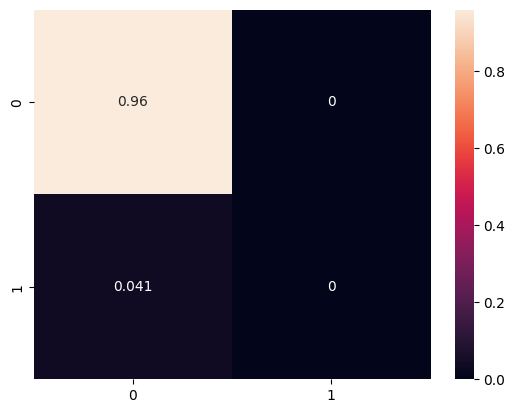

In [ ]:
test = pd.read_csv(common_file_path + "valid.csv")
y_test_pred = text_clf.predict(test["reviewBody"])
print("Test Accuracy: ", accuracy_score(test["Sentiment"], y_test_pred))
print("Test class-wise f1 score: ", f1_score(test["Sentiment"], y_test_pred, average = None))
print("Test macro averaged f1 score: ", f1_score(test["Sentiment"], y_test_pred, average = 'macro'))
display("Test confusion matrix (normalized over all) ", sns.heatmap(confusion_matrix(valid["Sentiment"], y_test_pred, normalize = 'all'), annot = True))
plt.show()